<a href="https://colab.research.google.com/github/kochoravi/seq2seq/blob/master/seqLearning_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.test.is_gpu_available():
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

!pip install yfinance
import yfinance as yf  
import pandas as pd

TensorFlow 2.x selected.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
No GPU was detected. LSTMs and CNNs can be very slow without a GPU.
Go to Runtime > Change runtime and select a GPU hardware accelerator.
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b37eb9a5a24a795de27ace6b4e043b025d8cdc4cadae6306d07ae964f191f4b9
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
data = yf.download('AAPL','2016-01-01','2020-06-03')
dlen =  len(data)
optrain, opvalid, optest = data["Open"][:round((dlen)*.8)], data["Open"][round((dlen)*.8)+1: round((dlen)*.9)], data["Open"][round((dlen)*.9)+1:]

[*********************100%***********************]  1 of 1 completed


In [11]:
optrain.shape

(841,)

In [0]:
trainingvalues = optrain.values.reshape(-1,1)

In [19]:
trainingvalues.shape

(841, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0.00001, .99))
# sc = StandardScaler()
training_set_scaled = sc.fit_transform(trainingvalues) 

In [91]:
# training_set_scaled = stoptrain.values.reshape(-1,1)
training_set_scaled.shape

(841, 1)

In [92]:
len(optrainvals)

841

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
Y_train = []
window_size=60
tlen=len(optrainvals)
for i in range(window_size, tlen):
    X_train.append(training_set_scaled[i-window_size:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],-1)
Y_train=Y_train.reshape(-1,1)


In [94]:
X_train.shape

(781, 60, 1)

In [96]:
Y_train.shape

(781, 1)

In [0]:
# X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
# X = X_new
# for step_ahead in range(10):
#     y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
#     X = np.concatenate([X, y_pred_one], axis=1)

# Y_pred = X[:, n_steps:]

In [0]:
X_t, X_v = X_train[:700], X_train[700:]
Y_t, Y_v = Y_train[:700], Y_train[700:]

In [123]:
X_t.shape

(700, 60, 1)

In [124]:
Y_v.shape

(81, 1)

In [125]:
np.random.seed(42)
tf.random.set_seed(42)

# model = keras.models.Sequential([
#     keras.layers.SimpleRNN(1, input_shape=[None, 1])
# ])

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_t, Y_t, epochs=20,
                    validation_data=(X_v, Y_v))

Train on 700 samples, validate on 81 samples
Epoch 1/20
700/700 [==============================] - 3s 4ms/sample - loss: 0.2494 - val_loss: 0.0373
Epoch 2/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0267 - val_loss: 0.0080
Epoch 3/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0063 - val_loss: 0.0069
Epoch 4/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0049 - val_loss: 0.0068
Epoch 5/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0047 - val_loss: 0.0065
Epoch 6/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0039 - val_loss: 0.0057
Epoch 7/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0031 - val_loss: 0.0054
Epoch 8/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0029 - val_loss: 0.0051
Epoch 9/20
700/700 [==============================] - 1s 1ms/sample - loss: 0.0032 - val_loss: 0.0045
Epoch 10/20
700/700 [================

In [128]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_13 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.evaluate(X_v, Y_v)

81/81 [==============================] - 0s 333us/sample - loss: 0.0015


0.0014826537441910692

In [0]:
y_pred = model.predict(X_v)


In [103]:
y_pred.shape

(81, 1)

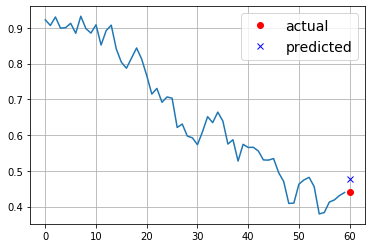

In [106]:
plt.plot(X_v[1, :, 0])
plt.plot(window_size, Y_v[1], 'ro', label = "actual")
plt.plot(window_size, y_pred[1], 'bx', label = "predicted")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

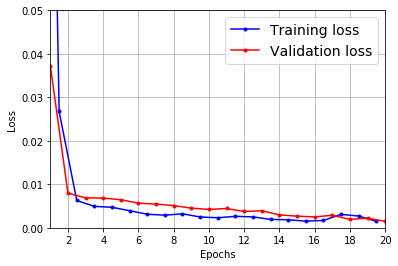

In [57]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

predict 10 steps ahead

In [110]:
Y_t.shape

(700, 1)

Now let's create an RNN that predicts all 10 next values at once:

In [0]:
# Creating a data structure with 50 timesteps +10 prediction step and 1 output
X_train = []
Y_train = []
window_size = 50
pred_size = 10
tlen=len(optrainvals)
for i in range(window_size + pred_size, tlen):
    X_train.append(training_set_scaled[i-(window_size + pred_size):(i-pred_size), 0])
    Y_train.append(training_set_scaled[(i-pred_size):i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping since the rnns needs 3D vector of [nsample, timesteps = 50, nfeatures = 1]
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],-1)
Y_train=Y_train.reshape(Y_train.shape[0], Y_train.shape[1],1)

In [0]:
X_t, X_v = X_train[:700], X_train[700:]
Y_t, Y_v = Y_train[:700], Y_train[700:]

In [119]:
X_t.shape

(700, 50, 1)

In [120]:
Y_t.shape

(700, 10, 1)

Now let's create an RNN that predicts all 10 next values at once:

In [113]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_t, Y_t, epochs=20,
                    validation_data=(X_v, Y_v))

Train on 700 samples, validate on 81 samples
Epoch 1/20
700/700 [==============================] - 2s 2ms/sample - loss: 0.1695 - val_loss: 0.1032
Epoch 2/20
700/700 [==============================] - 0s 603us/sample - loss: 0.0400 - val_loss: 0.0226
Epoch 3/20
700/700 [==============================] - 0s 610us/sample - loss: 0.0119 - val_loss: 0.0072
Epoch 4/20
700/700 [==============================] - 0s 604us/sample - loss: 0.0066 - val_loss: 0.0047
Epoch 5/20
700/700 [==============================] - 0s 617us/sample - loss: 0.0048 - val_loss: 0.0036
Epoch 6/20
700/700 [==============================] - 0s 600us/sample - loss: 0.0042 - val_loss: 0.0036
Epoch 7/20
700/700 [==============================] - 0s 573us/sample - loss: 0.0037 - val_loss: 0.0033
Epoch 8/20
700/700 [==============================] - 0s 578us/sample - loss: 0.0034 - val_loss: 0.0037
Epoch 9/20
700/700 [==============================] - 0s 577us/sample - loss: 0.0032 - val_loss: 0.0035
Epoch 10/20
700/700 [

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


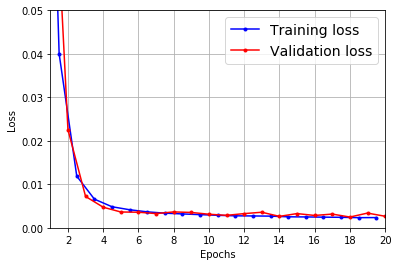

In [115]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [0]:
Y_pred = model.predict(X_v)[..., np.newaxis]

In [117]:
Y_pred.shape

(81, 10, 1)

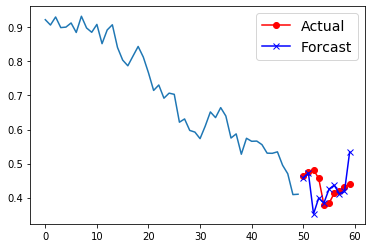

In [118]:
  plt.plot(X_v[1, :, 0])
  plt.plot(np.arange(window_size, window_size + pred_size), Y_v[1, :, 0], "ro-", label="Actual")
  plt.plot(np.arange(window_size, window_size + pred_size), Y_pred[1, :, 0], "bx-", label="Forcast")
  plt.legend(fontsize=14)
  plt.show()
  # plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0.00001, .99))
# sc = StandardScaler()
stoptrain = sc.fit_transform(optrainvals) 

In [0]:

# opset = tf.data.Dataset.from_tensor_slices(stoptrain)
opset = tf.data.Dataset.from_tensor_slices(stoptrain)
n_steps = 100
window_length = n_steps + 1 # target = input shifted 1 character ahead

opset = opset.repeat().window(window_length, shift=1, drop_remainder=True)
opset = opset.flat_map(lambda window: window.batch(window_length))

np.random.seed(42)
tf.random.set_seed(42)
batch_size = 32

opset = opset.shuffle(100000).map(lambda window: (window[:-1], window[1:]))
opset = opset.batch(batch_size).prefetch(1)
# for index, (X_batch, Y_batch) in enumerate(opset.take(3)):
#     print("_" * 20, "Batch", index, "\nX_batch")
#     print(X_batch.numpy())
#     print("=" * 5, "\nY_batch")
#     print(Y_batch.numpy())